# Abdullah Alhussni - aa10108
## Applied Machine Learning - ENGR-UH 3332 - Project 5

In [143]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [144]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU(x):
    return np.maximum(0, x)

def ReLU_deriv(x):
    return 1 * (x >= 0)

def tanH(x):
    return np.tanh(x)

def tanH_deriv(x):
    return 1 - tanH(x)**2

def onehot(y):
    onehot = np.zeros((y.size, y.max()+1))
    onehot[np.arange(y.size), y] = 1
    return onehot

class Neural_Network:
    def __init__(self, X, y, n_hidden):
        self.X = X
        self.y = onehot(y)
        self.y_pred = np.zeros(self.y.shape)
        self.n_hidden = n_hidden
        self.activ_func = None
        self.activ_deriv = None
        self.n_input = self.X.shape[1]
        self.n_output = self.y.shape[1]
        self.weights1 = np.random.randn(self.n_input, self.n_hidden) * np.sqrt(1 / self.n_input) # normalizing the weights improved the accuracy by 10%
        self.bias1 = np.zeros((1, self.n_hidden))
        self.weights2 = np.random.randn(self.n_hidden, self.n_output) * np.sqrt(1 / self.n_hidden)
        self.bias2 = np.zeros((1, self.n_output))
        self.Z1 = np.zeros((self.X.shape[0], self.n_hidden))
        self.A1 = np.zeros((self.X.shape[0], self.n_hidden))
        self.Z2 = np.zeros((self.X.shape[0], self.n_output))
        self.A2 = np.zeros((self.X.shape[0], self.n_output))

    def feedforward(self, activ_func, X = None):
        if X is None:
            self.Z1 = np.dot(self.X, self.weights1) + self.bias1
            self.A1 = activ_func(self.Z1)
            self.Z2 = np.dot(self.A1, self.weights2) + self.bias2
            self.A2 = activ_func(self.Z2)
            self.y_pred = self.A2
        else:
            self.Z1 = np.dot(X, self.weights1) + self.bias1
            self.A1 = activ_func(self.Z1)
            self.Z2 = np.dot(self.A1, self.weights2) + self.bias2
            self.A2 = activ_func(self.Z2)
            y_test = self.A2
            return y_test

    def backpropagation(self, activ_deriv, eta):
        dEdyh = self.y_pred - self.y
        dyhdZ2 = activ_deriv(self.Z2)
        dZ2dW2 = self.A1
        dZ2dA1 = self.weights2
        dA1dZ1 = activ_deriv(self.Z1)
        dZ1dW1 = self.X

        dEdw2 = np.dot(dZ2dW2.T, dEdyh * dyhdZ2)
        dEdw1 = np.dot(dZ1dW1.T, np.dot(dEdyh * dyhdZ2, dZ2dA1.T) * dA1dZ1)
        dEdb2 = np.sum(dEdyh * dyhdZ2, axis = 0)
        dEdb1 = np.sum(np.dot(dEdyh * dyhdZ2, dZ2dA1.T) * dA1dZ1, axis = 0)

        self.weights2 -= eta * dEdw2
        self.weights1 -= eta * dEdw1
        self.bias2 -= eta * dEdb2
        self.bias1 -= eta * dEdb1

    def train(self, activ_func, activ_deriv, eta, n_epochs):
        self.activ_func = activ_func
        self.activ_deriv = activ_deriv
        for i in range(n_epochs):
            self.feedforward(activ_func)
            self.backpropagation(activ_deriv, eta)
    
    def restart(self):
        self.weights1 = np.random.randn(self.n_input, self.n_hidden) * np.sqrt(1 / self.n_input)
        self.bias1 = np.zeros((1, self.n_hidden))
        self.weights2 = np.random.randn(self.n_hidden, self.n_output) * np.sqrt(1 / self.n_hidden)
        self.bias2 = np.zeros((1, self.n_output))
        self.Z1 = np.zeros((self.X.shape[0], self.n_hidden))
        self.A1 = np.zeros((self.X.shape[0], self.n_hidden))
        self.Z2 = np.zeros((self.X.shape[0], self.n_output))
        self.A2 = np.zeros((self.X.shape[0], self.n_output))
        self.y_pred = np.zeros(self.y.shape)
        self.activ_func = None
        self.activ_deriv = None

    def accuracy(self, X_test, y_test):
        y_pred = self.feedforward(self.activ_func, X_test)
        y_pred = np.argmax(y_pred, axis = 1)
        return accuracy_score(y_test, y_pred)

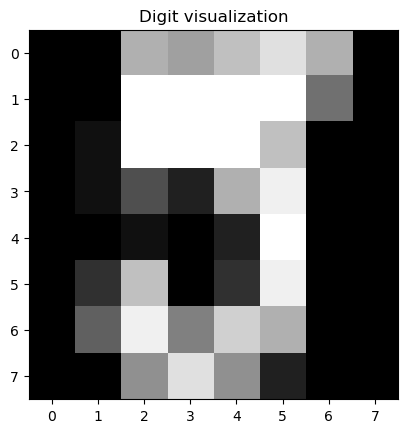

In [145]:
X, y = load_digits(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sample_digit = X[np.random.randint(0, X.shape[0]), :]
sample_digit = sample_digit.reshape(8, 8)

plt.imshow(sample_digit, cmap = 'gray')
plt.title("Digit visualization")
plt.show()

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
nn = Neural_Network(X_train, y_train, 30)

n_epochs = 1000

eta = 0.001

nn.train(sigmoid, sigmoid_deriv, eta, n_epochs)

print(f"Accuracy for Sigmoid: {100 * nn.accuracy(X_test, y_test):.2f}%")

nn.restart()

nn.train(ReLU, ReLU_deriv, eta, n_epochs)

print(f"Accuracy for ReLU: {100 * nn.accuracy(X_test, y_test):.2f}%")

nn.restart()

nn.train(tanH, tanH_deriv, eta, n_epochs)

print(f"Accuracy for tanh: {100 * nn.accuracy(X_test, y_test):.2f}%")

nn.restart()

Accuracy for Sigmoid: 96.67%
Accuracy for ReLU: 28.06%
Accuracy for tanh: 95.56%


It seems that ReLU is not providing very good accuracy scores, while tanh and sigmoid are providing similar good results, with sigmoid giving a slightly higher accuracy for the most part. We will stick with sigmoid for the rest of our experiments on hyperparameters.

In [147]:
n_epochs = 10000

eta = 0.0001

nn.train(sigmoid, sigmoid_deriv, eta, n_epochs)

print(f"Accuracy: {100 * nn.accuracy(X_test, y_test):.2f}%")

nn.restart()

Accuracy: 97.22%


In [148]:
n_epochs = 1000

eta = 0.01

nn.train(sigmoid, sigmoid_deriv, eta, n_epochs)

print(f"Accuracy: {100 * nn.accuracy(X_test, y_test):.2f}%")

nn.restart()

Accuracy: 58.61%


In [149]:
n_epochs = 1000

eta = 0.001

nn.train(sigmoid, sigmoid_deriv, eta, n_epochs)

print(f"Accuracy: {100 * nn.accuracy(X_test, y_test):.2f}%")

nn.restart()

Accuracy: 96.94%


In [150]:
n_epochs = 10000

eta = 0.001

nn.train(sigmoid, sigmoid_deriv, eta, n_epochs)

print(f"Accuracy: {100 * nn.accuracy(X_test, y_test):.2f}%")

nn.restart()

Accuracy: 97.50%


It seems that eta = 0.001 is a good value (or something in the range of 10^-4 and 10^-3). It's converging around 1000 epochs, although going up to 10000 could increase the accuracy. It will fall somewhere around 96-98% anyway.